## Training

In [1]:


import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # 用 CPU
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from umap.parametric_umap import ParametricUMAP   # ← 关键改动（官方包路径）


# ───────── 1. 读取数据 ─────────
X_trimmed = np.load('/data/hanzhe/20250424cs/X_trimmed.npy')
y_trimmed = np.load('/data/hanzhe/20250424cs/y_trimmed.npy')

# ───────── 2. 二分类标签 ─────────
label_bin = (y_trimmed > 0).astype(int)         # 0: y≤0 , 1: y>0
print("原始 y 唯一值:", np.unique(y_trimmed))
print("二分类后计数:", dict(zip(*np.unique(label_bin, return_counts=True))))

# ───────── 3. Parametric-UMAP 训练 ─────────
# 默认网络：3 层全连接 (100→100→100) + 输出层
embedder = ParametricUMAP(
    n_components=2,
    n_neighbors=15,
    min_dist=0.1,
    metric='euclidean',
    target_metric='euclidean',    # 监督用同一度量
    random_state=42,
    verbose=True,                 # 打印训练进度 & loss
    # 其余(批大小、训练轮次、优化器等)保持默认
)

embedding = embedder.fit_transform(X_trimmed, y=label_bin)
print("嵌入完成，形状:", embedding.shape)

# ───────── 4. 保存模型和结果 ─────────
out_dir = '/data/hanzhe/20250424cs/umap_parametric'

# ② 保存 Parametric-UMAP（会生成 encoder.keras / decoder.keras / metadata.yml …）
embedder.save('/data/hanzhe/20250424cs/umap_parametric')

# ③ 另存嵌入与标签
np.save(os.path.join(out_dir, 'embedding_pumap.npy'), embedding)



/home/user/anaconda3/envs/gpu/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-04-24 12:33:16.700828: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745497996.714598 1836716 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745497996.718831 1836716 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745497996.730835 1836716 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once

原始 y 唯一值: [-1.34921374 -1.25730208 -1.23184218 ...  3.49903587  3.49917218
  3.49946047]
二分类后计数: {np.int64(0): np.int64(478), np.int64(1): np.int64(5000)}
ParametricUMAP()
Thu Apr 24 12:33:20 2025 Construct fuzzy simplicial set
Thu Apr 24 12:33:20 2025 Finding Nearest Neighbors
Thu Apr 24 12:33:20 2025 Building RP forest with 9 trees


2025-04-24 12:33:20.221942: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2025-04-24 12:33:20.221994: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:167] env: CUDA_VISIBLE_DEVICES="-1"
2025-04-24 12:33:20.222001: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:170] CUDA_VISIBLE_DEVICES is set to -1 - this hides all GPUs from CUDA
2025-04-24 12:33:20.222012: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:178] verbose logging is disabled. Rerun with verbose logging (usually --v=1 or --vmodule=cuda_diagnostics=1) to get more diagnostic output from this module
2025-04-24 12:33:20.222018: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:183] retrieving CUDA diagnostic information for host: cez147
2025-04-24 12:33:20.222021: I external/local_xla/xla/stream_executor/cuda/cuda_d

Thu Apr 24 12:33:24 2025 NN descent for 12 iterations
	 1  /  12
	 2  /  12
	 3  /  12
	 4  /  12
	 5  /  12
	 6  /  12
	 7  /  12
	 8  /  12
	Stopping threshold met -- exiting after 8 iterations
Thu Apr 24 12:33:35 2025 Finished Nearest Neighbor Search


/home/user/anaconda3/envs/gpu/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Thu Apr 24 12:33:39 2025 Construct embedding
Epoch 1/10


/home/user/anaconda3/envs/gpu/lib/python3.10/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'umap_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


6899/6899 ━━━━━━━━━━━━━━━━━━━━ 32s 4ms/step - loss: 0.4252
Epoch 2/10
6899/6899 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step - loss: 0.3850
Epoch 3/10
6899/6899 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - loss: 0.3831
Epoch 4/10
6899/6899 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - loss: 0.3824
Epoch 5/10
6899/6899 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step - loss: 0.3816
Epoch 6/10
6899/6899 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step - loss: 0.3811
Epoch 7/10
6899/6899 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step - loss: 0.3809
Epoch 8/10
6899/6899 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - loss: 0.3806
Epoch 9/10
6899/6899 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step - loss: 0.3803
Epoch 10/10
6899/6899 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step - loss: 0.3803
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step
Thu Apr 24 12:39:05 2025 Finished embedding
嵌入完成，形状: (5478, 2)


FileNotFoundError: [Errno 2] No such file or directory: '/data/hanzhe/20250424cs/umap_parametric/pumap_model/encoder.keras'

In [6]:
# ② 保存 Parametric-UMAP（会生成 encoder.keras / decoder.keras / metadata.yml …）
embedder.save('/data/hanzhe/20250424cs/umap_parametric/model')

# ③ 另存嵌入与标签
np.save(os.path.join(out_dir, 'embedding_pumap.npy'), embedding)

Keras encoder model saved to /data/hanzhe/20250424cs/umap_parametric/model/encoder.keras
Keras full model saved to /data/hanzhe/20250424cs/umap_parametric/model/parametric_model.keras
Thu Apr 24 12:48:48 2025 Building and compiling search function
Pickle of ParametricUMAP model saved to /data/hanzhe/20250424cs/umap_parametric/model/model.pkl


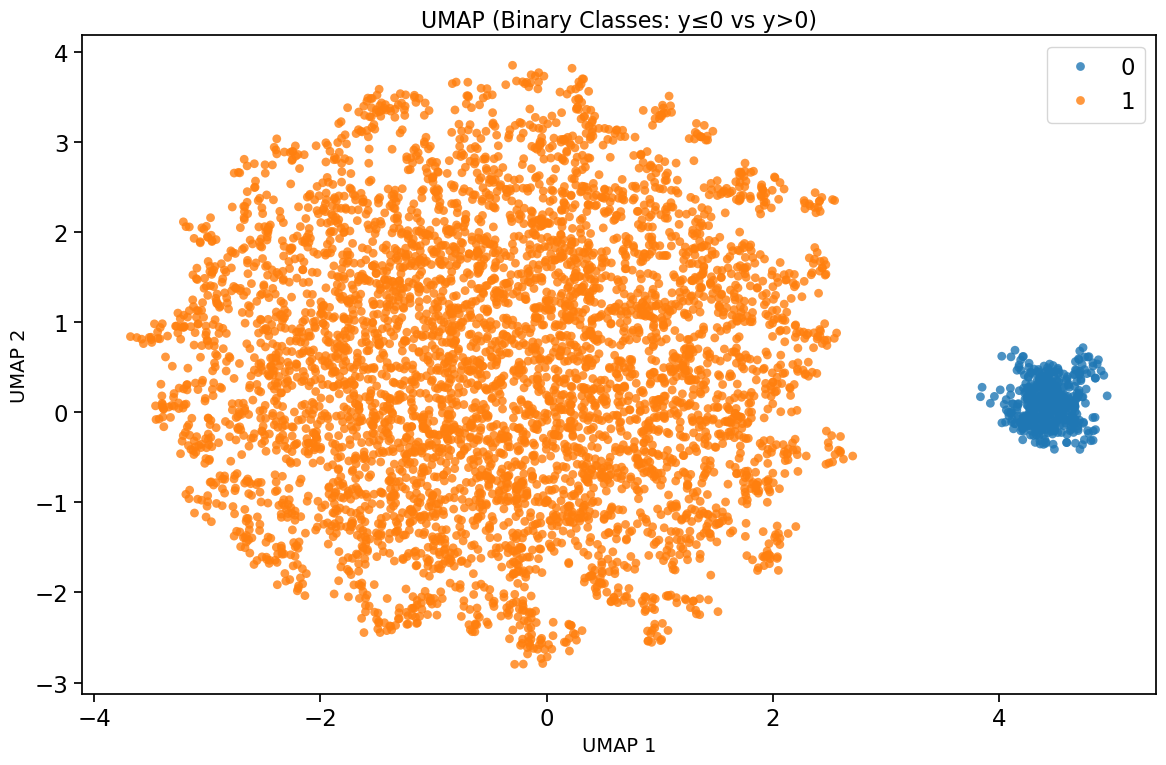

In [7]:
#!/usr/bin/env python
# coding: utf-8
"""
绘制二分类 UMAP 散点图
----------------------------------------
依赖:
  pip install numpy matplotlib seaborn
"""

import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ───────── 1. 读取数据 ─────────
embed_path = '/data/hanzhe/20250424cs/umap_parametric/embedding_pumap.npy'
y_path     = '/data/hanzhe/20250424cs/y_trimmed.npy'

embedding = np.load(embed_path)          # (n_samples, 2)
y         = np.load(y_path)              # (n_samples,)

# ───────── 2. 压缩为两类 ─────────
#   label_bin = 0  ⇨  y <= 0
#   label_bin = 1  ⇨  y > 0
label_bin = (y > 0).astype(int)

# ───────── 3. 绘图 ─────────
sns.set_context("notebook", font_scale=1.5)
plt.figure(figsize=(12, 8))

palette = {0: "#1f77b4", 1: "#ff7f0e"}    # 两种颜色，可自行调
sns.scatterplot(
    x=embedding[:, 0],
    y=embedding[:, 1],
    hue=label_bin,
    palette=palette,
    alpha=0.8,
    s=40,
    edgecolor="none"
)

plt.title("UMAP (Binary Classes: y≤0 vs y>0)", fontsize=16)
plt.xlabel("UMAP 1", fontsize=14)
plt.ylabel("UMAP 2", fontsize=14)

plt.tight_layout()

# ───────── 4. 保存图像 ─────────
out_path = '/data/hanzhe/20250424cs/umap_parametric/umap_scatter_binary.png'
plt.savefig(out_path, dpi=300)
plt.show()



## Inference

In [9]:

import os
import numpy as np
from umap.parametric_umap import load_ParametricUMAP   # ← 官方加载 API
# 若此前使用 `from parametric_umap import ParametricUMAP` 保存，
# 这里依旧使用同一个包路径 (两者等价)

# ───────── 1. 路径 ─────────
model_dir = '/data/hanzhe/20250424cs/umap_parametric/model'  # 包含 encoder.keras 等文件
x_path    = '/data/hanzhe/20250424cs/X_trimmed.npy'
save_path = '/data/hanzhe/20250424cs/umap_parametric/embedding_inference.npy'

# ───────── 2. 载入模型与数据 ─────────
embedder   = load_ParametricUMAP(model_dir)
X_trimmed  = np.load(x_path)



# ───────── 3. 推断 / 降维 ─────────
embedding  = embedder.transform(X_trimmed)   # shape: (n_samples, n_components)
print("嵌入矩阵形状 :", embedding.shape)

# ───────── 4. 保存结果 ─────────
os.makedirs(os.path.dirname(save_path), exist_ok=True)
np.save(save_path, embedding)
print("✅ 已保存至:", save_path)


Thu Apr 24 12:51:50 2025 Building and compiling search function
Pickle of ParametricUMAP model loaded from /data/hanzhe/20250424cs/umap_parametric/model/model.pkl
Keras encoder model loaded from /data/hanzhe/20250424cs/umap_parametric/model/encoder.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
嵌入矩阵形状 : (5478, 2)
✅ 已保存至: /data/hanzhe/20250424cs/umap_parametric/embedding_inference.npy


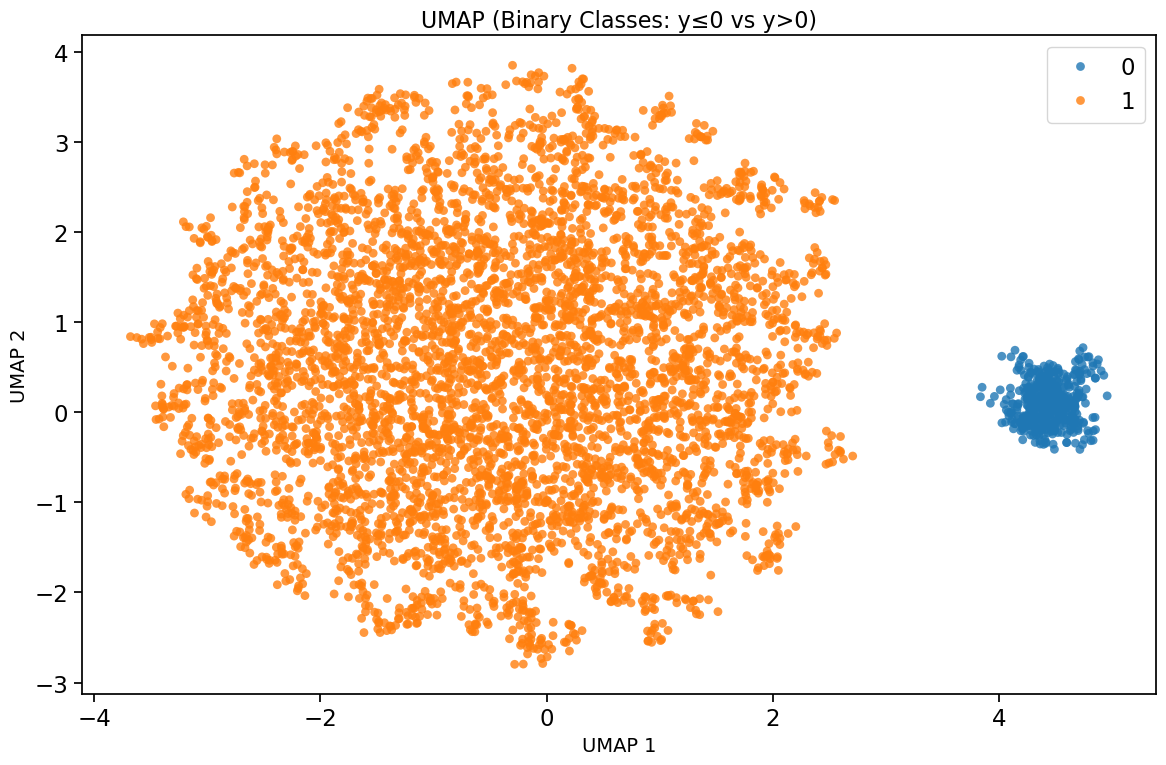

In [10]:
#!/usr/bin/env python
# coding: utf-8
"""
绘制二分类 UMAP 散点图
----------------------------------------
依赖:
  pip install numpy matplotlib seaborn
"""

import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ───────── 1. 读取数据 ─────────
embed_path = '/data/hanzhe/20250424cs/umap_parametric/embedding_inference.npy'
y_path     = '/data/hanzhe/20250424cs/y_trimmed.npy'

embedding = np.load(embed_path)          # (n_samples, 2)
y         = np.load(y_path)              # (n_samples,)

# ───────── 2. 压缩为两类 ─────────
#   label_bin = 0  ⇨  y <= 0
#   label_bin = 1  ⇨  y > 0
label_bin = (y > 0).astype(int)

# ───────── 3. 绘图 ─────────
sns.set_context("notebook", font_scale=1.5)
plt.figure(figsize=(12, 8))

palette = {0: "#1f77b4", 1: "#ff7f0e"}    # 两种颜色，可自行调
sns.scatterplot(
    x=embedding[:, 0],
    y=embedding[:, 1],
    hue=label_bin,
    palette=palette,
    alpha=0.8,
    s=40,
    edgecolor="none"
)

plt.title("UMAP (Binary Classes: y≤0 vs y>0)", fontsize=16)
plt.xlabel("UMAP 1", fontsize=14)
plt.ylabel("UMAP 2", fontsize=14)

plt.tight_layout()


plt.show()

